In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


In [455]:
hsg=pd.read_csv("Housing.csv")

In [456]:
hsg

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [457]:
hsg.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [458]:
hsg.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [459]:
hsg.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [460]:
hsg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


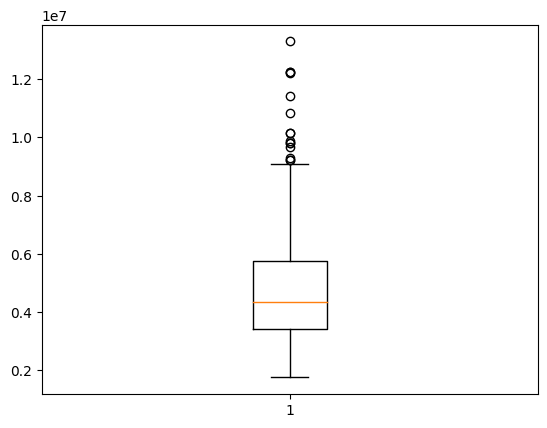

In [461]:
plt.boxplot(hsg.price)
Q1 = hsg.price.quantile(0.25)
Q3 = hsg.price.quantile(0.75)
IQR = Q3 - Q1
housing = hsg[(hsg.price >= Q1 - 1.5*IQR) & (hsg.price <= Q3 + 1.5*IQR)]

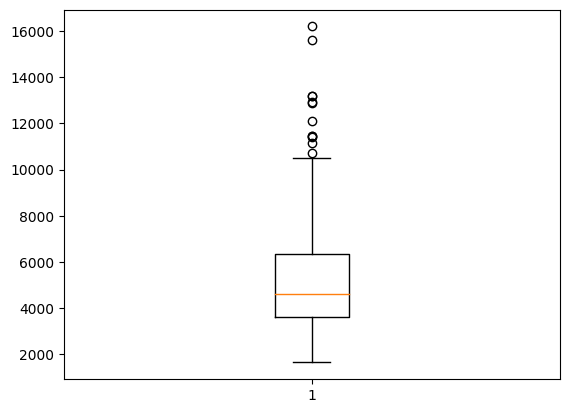

In [462]:
plt.boxplot(hsg.area)
Q1 = hsg.area.quantile(0.25)
Q3 = hsg.area.quantile(0.75)
IQR = Q3 - Q1
housing = hsg[(hsg.area >= Q1 - 1.5*IQR) & (hsg.area <= Q3 + 1.5*IQR)]

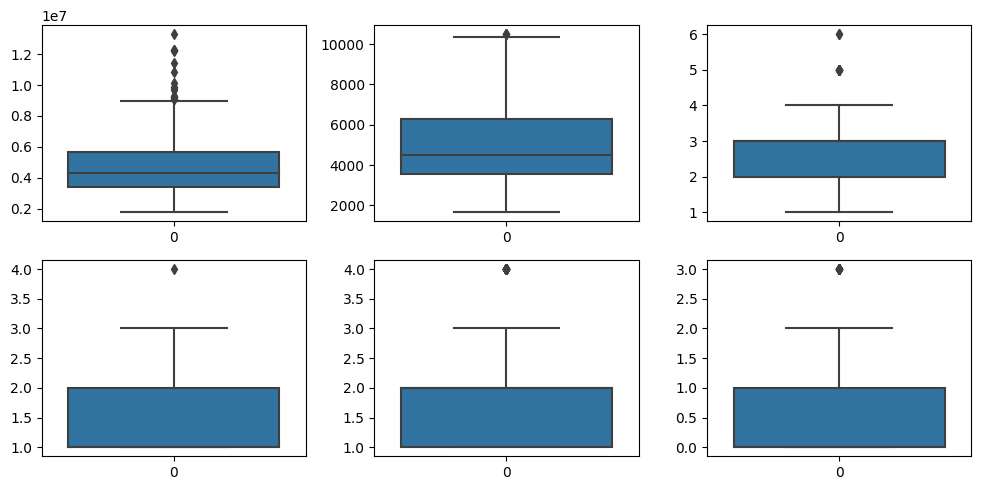

In [463]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [464]:
hsg.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [465]:
hsg=hsg.replace('yes', 1)
hsg=hsg.replace('no',0)

In [466]:
status = pd.get_dummies(hsg['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [467]:
status = pd.get_dummies(hsg['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [468]:
hsg=pd.concat([hsg,status],axis=1)
hsg.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [469]:
hsg.drop(['furnishingstatus'], axis = 1, inplace = True)
hsg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [470]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(hsg, train_size = 0.75, test_size = 0.25, random_state = 42)

In [471]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [472]:
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
167,0.336667,0.202749,0.2,0.333333,0.000000,1,0,0,0,1,0.666667,0,1,0
368,0.183333,0.274227,0.2,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,0
301,0.233333,0.128522,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
527,0.050000,0.012784,0.2,0.000000,0.000000,0,0,1,0,0,0.000000,0,1,0
382,0.173333,0.103093,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,0,0,0


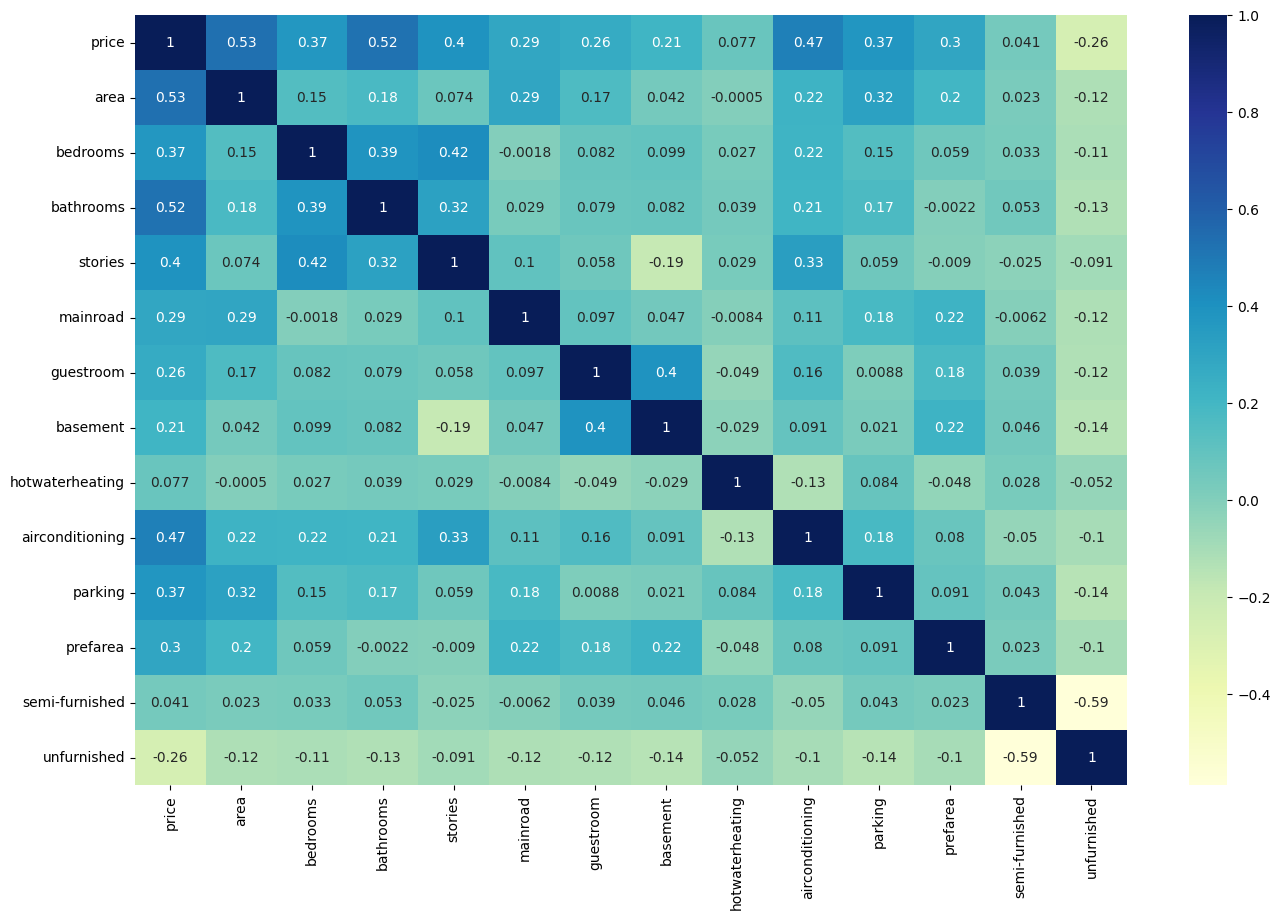

In [473]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [474]:
y= hsg.pop('price')
x = hsg
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [475]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [476]:
model.coef_

array([ 2.39794825e+02,  7.17762862e+04,  1.12406244e+06,  3.86426724e+05,
        3.72650913e+05,  2.70917183e+05,  4.01008776e+05,  6.91330606e+05,
        7.68994686e+05,  2.58881334e+05,  6.27423312e+05, -1.77801379e+05,
       -4.12019553e+05])

In [477]:
model.intercept_

273720.60462051164

In [478]:
y_pred=model.predict(x_test)

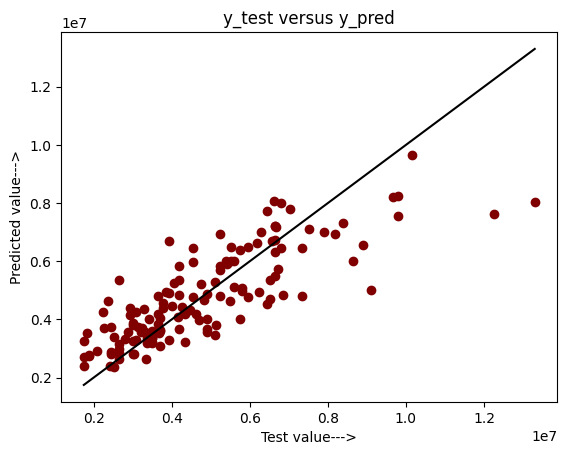

In [479]:
plt.scatter(y_test,y_pred, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.show()

In [480]:
per_error = 100*(y_pred-y_test)/y_test

tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})


In [481]:
tst

,Predicted Price,Actual Price,% Error
316,5244464,4060000,29.173993
77,7224189,6650000,8.634433
360,3091382,3710000,-16.674314
90,4548783,6440000,-29.366713
493,3321777,2800000,18.634894
...,...,...,...
172,6946979,5250000,32.323426
124,6479074,5950000,8.892012
388,3221847,3500000,-7.947205
521,2387396,2408000,-0.855607


In [484]:
print('The root Mean Squared error(i.e RMSE) is :',mean_squared_error(y_test,y_pred,squared=False))

The root Mean Squared error(i.e RMSE) is : 1245949.1294090005


In [486]:
print('The R2 score is: ',r2_score(y_test,y_pred))

The R2 score is:  0.6631280462200982
